In [47]:
#import library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Reading the sales_data csv file, loading the dataset.
df = pd.read_excel("/Users/xinyuanliang/Desktop/Group Project Data-SFD Data-Toronto Police (2).xlsx")
df2 = df[['OCC_DOY', 'OCC_YEAR', 'OCC_MONTH', 'DEATH', 'INJURIES','HOOD_158', 'NEIGHBOURHOOD_158']]

#把数据中的no specific area 清掉了
df2.loc[:,'HOOD_158'] = df2['HOOD_158'].replace('NSA', np.nan)
df2.loc[:,'NEIGHBOURHOOD_158'] = df2['NEIGHBOURHOOD_158'].replace('NSA', np.nan)
df2=df2.dropna(subset=['HOOD_158','NEIGHBOURHOOD_158'])
df2.info()
print(df2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643 entries, 0 to 5706
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OCC_DOY            5643 non-null   int64  
 1   OCC_YEAR           5643 non-null   int64  
 2   OCC_MONTH          5643 non-null   object 
 3   DEATH              5643 non-null   int64  
 4   INJURIES           5643 non-null   int64  
 5   HOOD_158           5643 non-null   float64
 6   NEIGHBOURHOOD_158  5643 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 352.7+ KB
OCC_DOY              0
OCC_YEAR             0
OCC_MONTH            0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
dtype: int64


/var/folders/y3/27ykk6jn6d9973zrtpqtdvy40000gn/T/ipykernel_21460/2726145410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'HOOD_158'] = df2['HOOD_158'].replace('NSA', np.nan)
/var/folders/y3/27ykk6jn6d9973zrtpqtdvy40000gn/T/ipykernel_21460/2726145410.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:,'HOOD_158'] = df2['HOOD_158'].replace('NSA', np.nan)
/var/folders/y3/27ykk6jn6d9973zrtpqtdvy40000gn/T/ipykernel_21460/2726145410.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [48]:
#描述每一年里发生次数最多的月份和次数
df2.groupby('OCC_YEAR')[['OCC_MONTH']].describe(include='all')

OCC_MONTH                     
             count unique      top freq
OCC_YEAR                               
2004           183     12      May   24
2005           251     12     July   32
2006           208     12     June   25
2007           202     12     July   26
2008           235     12     July   32
2009           247     12   August   36
2010           251     12     July   37
2011           223     12  October   29
2012           215     12  January   30
2013           195     12   August   33
2014           177     12  October   21
2015           288     12     June   40
2016           407     12   August   48
2017           392     12     July   44
2018           427     12      May   54
2019           492     12  October   57
2020           462     12   August   68
2021           409     12     July   51
2022           379     12     June   40

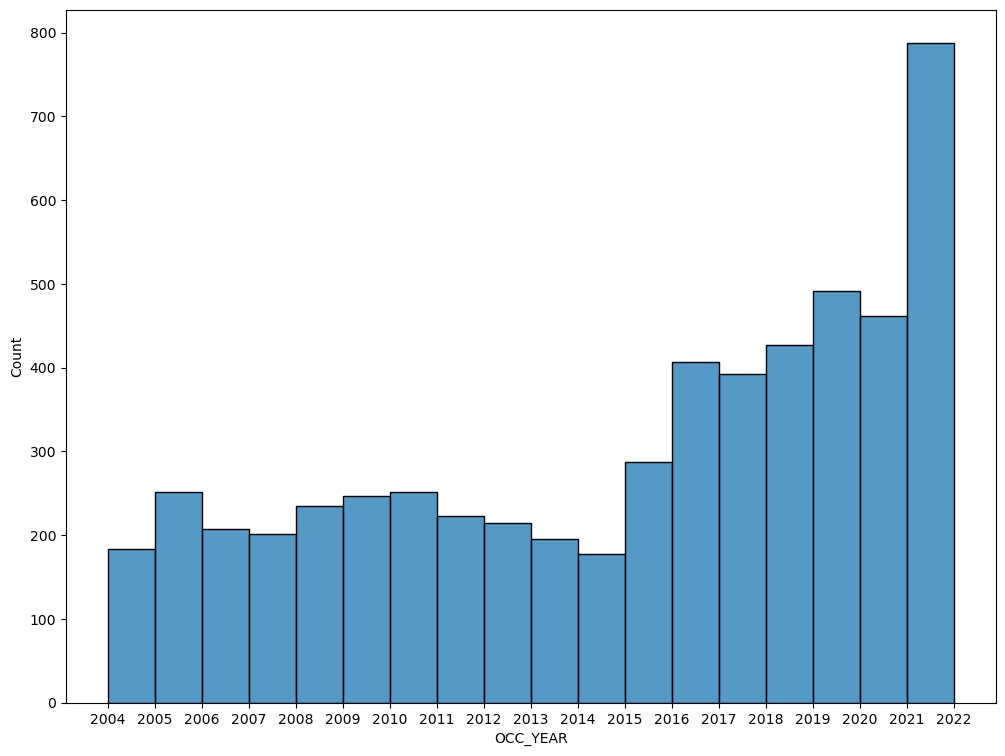

In [49]:
df3 = df2.groupby('OCC_YEAR')
df4=df2.groupby('OCC_MONTH')
fig= plt.subplots(figsize=(12,9))
sns.histplot(
    data = df2,
    x = 'OCC_YEAR'
)
plt.xticks(range(2004,2023,1))
plt.show()

OCC_YEAR
2004    26
2005    53
2006    29
2007    44
2008    37
2009    37
2010    32
2011    28
2012    34
2013    22
2014    27
2015    26
2016    41
2017    39
2018    51
2019    44
2020    39
2021    46
2022    44
Name: DEATH, dtype: int64


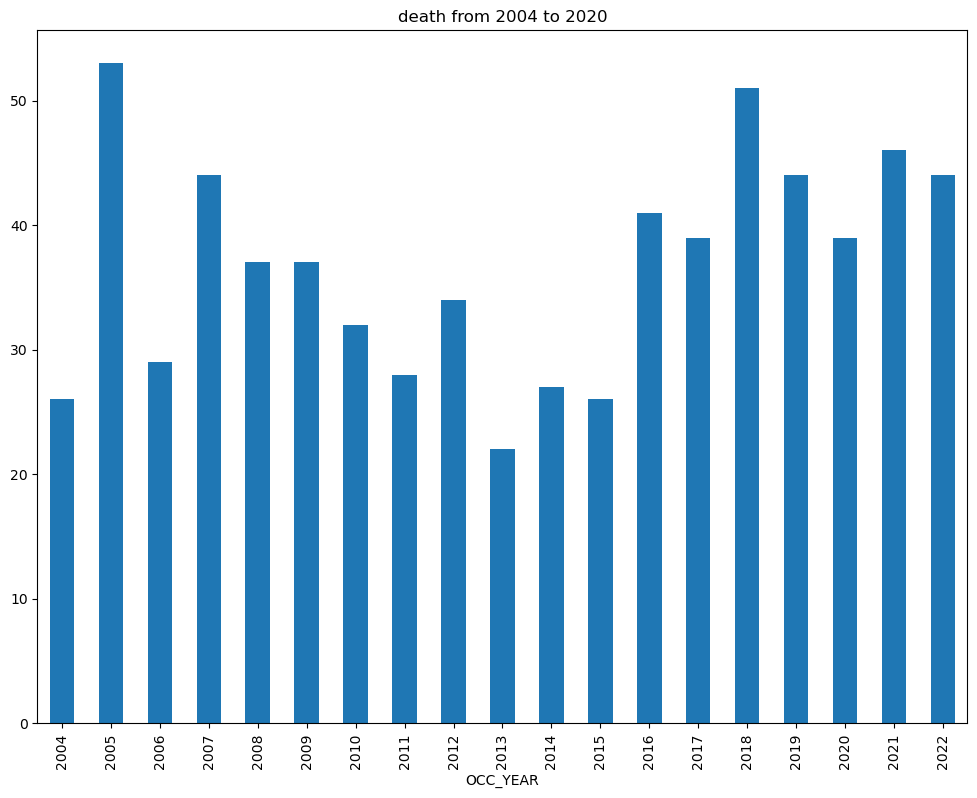

In [50]:
death_count = df.groupby('OCC_YEAR')['DEATH'].sum().head(20) 
print(death_count)
death_count =death_count.plot(kind='bar', figsize=(12,9), title='death from 2004 to 2020')

OCC_YEAR
2004     96
2005    178
2006    173
2007    129
2008    171
2009    144
2010    138
2011    113
2012    114
2013    119
2014     76
2015    126
2016    152
2017    148
2018    178
2019    240
2020    178
2021    163
2022    150
Name: INJURIES, dtype: int64


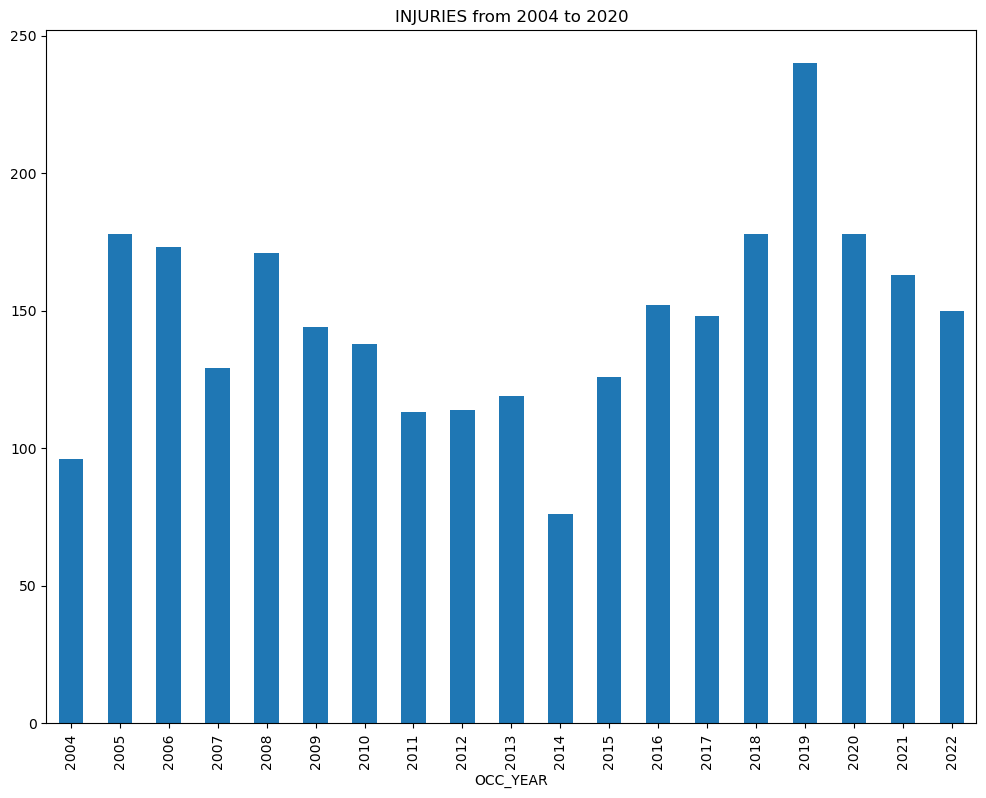

In [51]:
INJURIES_count = df.groupby('OCC_YEAR')['INJURIES'].sum().head(20) 
print(INJURIES_count)
INJURIES_count =INJURIES_count.plot(kind='bar', figsize = (12,9), title='INJURIES from 2004 to 2020')

In [52]:

death_count = df.groupby('OCC_YEAR')['DEATH'].sum().head(20)
print(death_count)

OCC_YEAR
2004    26
2005    53
2006    29
2007    44
2008    37
2009    37
2010    32
2011    28
2012    34
2013    22
2014    27
2015    26
2016    41
2017    39
2018    51
2019    44
2020    39
2021    46
2022    44
Name: DEATH, dtype: int64


In [53]:
injuries_count = df.groupby('OCC_YEAR')['INJURIES'].sum().head(20)
print(injuries_count)

OCC_YEAR
2004     96
2005    178
2006    173
2007    129
2008    171
2009    144
2010    138
2011    113
2012    114
2013    119
2014     76
2015    126
2016    152
2017    148
2018    178
2019    240
2020    178
2021    163
2022    150
Name: INJURIES, dtype: int64


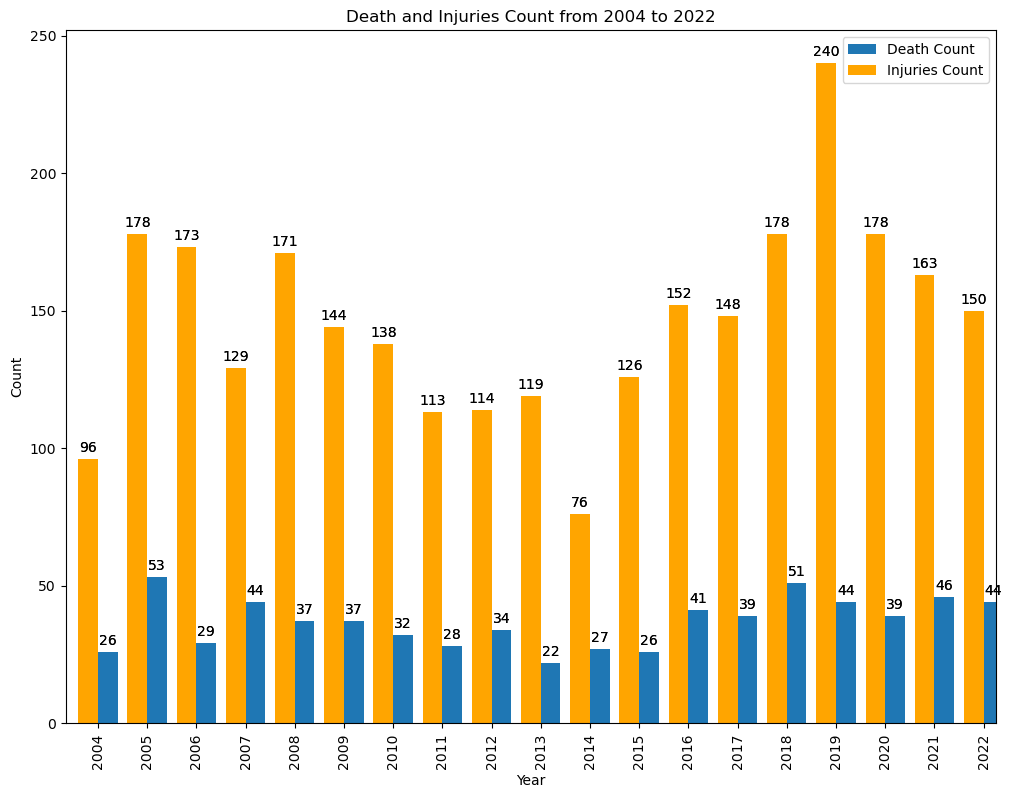

In [54]:

fig, ax = plt.subplots(figsize=(12, 9))
death_count = death_count.plot(kind='bar', figsize=(12,9),ax=ax, width=0.4, position=0, label='Death Count')

injuries_count = injuries_count.plot(kind='bar', figsize=(12,9), ax=ax, width = 0.4, position=1, color='orange', label='Injuries Count')

for bar in death_count.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

for bar in injuries_count.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')
    
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Death and Injuries Count from 2004 to 2022')


ax.legend()